In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.utils.class_weight import compute_class_weight

Pengumpulan Data (Load Dataset)

In [3]:
data = pd.read_csv("data_file.csv")
data.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


Cleaning Data

In [4]:
data = data.drop(columns=['FileName', 'md5Hash'])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Machine             62485 non-null  int64
 1   DebugSize           62485 non-null  int64
 2   DebugRVA            62485 non-null  int64
 3   MajorImageVersion   62485 non-null  int64
 4   MajorOSVersion      62485 non-null  int64
 5   ExportRVA           62485 non-null  int64
 6   ExportSize          62485 non-null  int64
 7   IatVRA              62485 non-null  int64
 8   MajorLinkerVersion  62485 non-null  int64
 9   MinorLinkerVersion  62485 non-null  int64
 10  NumberOfSections    62485 non-null  int64
 11  SizeOfStackReserve  62485 non-null  int64
 12  DllCharacteristics  62485 non-null  int64
 13  ResourceSize        62485 non-null  int64
 14  BitcoinAddresses    62485 non-null  int64
 15  Benign              62485 non-null  int64
dtypes: int64(16)
memory usage: 7.6 MB


Split Data (Data Train dan Data Test)

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into train (80%) and test (20%) sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# File paths for saving
train_file_path = "train_data.csv"
test_file_path = "test_data.csv"

# Save to separate CSV files
train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

train_file_path, test_file_path

('train_data.csv', 'test_data.csv')

Pre-processing (Data Train)

In [6]:
train = pd.read_csv("train_data.csv")
train.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,56,147600,0,4,148496,186,147456,5,12,5,1048576,0,808,0,0
1,332,28,291712,0,4,0,0,8192,48,0,3,1048576,34112,1220,0,1
2,332,28,88660,0,4,0,0,8192,11,0,3,1048576,34112,1432,0,1
3,34404,28,23152,0,6,0,0,20480,14,0,6,1048576,33120,0,0,1
4,332,0,0,0,5,0,0,4096,2,50,4,1048576,32768,20576,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49988 entries, 0 to 49987
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Machine             49988 non-null  int64
 1   DebugSize           49988 non-null  int64
 2   DebugRVA            49988 non-null  int64
 3   MajorImageVersion   49988 non-null  int64
 4   MajorOSVersion      49988 non-null  int64
 5   ExportRVA           49988 non-null  int64
 6   ExportSize          49988 non-null  int64
 7   IatVRA              49988 non-null  int64
 8   MajorLinkerVersion  49988 non-null  int64
 9   MinorLinkerVersion  49988 non-null  int64
 10  NumberOfSections    49988 non-null  int64
 11  SizeOfStackReserve  49988 non-null  int64
 12  DllCharacteristics  49988 non-null  int64
 13  ResourceSize        49988 non-null  int64
 14  BitcoinAddresses    49988 non-null  int64
 15  Benign              49988 non-null  int64
dtypes: int64(16)
memory usage: 6.1 MB


In [8]:
# Mengubah kolom 'Benign' menjadi kategorik
train['Benign'] = pd.Categorical(train['Benign'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49988 entries, 0 to 49987
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Machine             49988 non-null  int64   
 1   DebugSize           49988 non-null  int64   
 2   DebugRVA            49988 non-null  int64   
 3   MajorImageVersion   49988 non-null  int64   
 4   MajorOSVersion      49988 non-null  int64   
 5   ExportRVA           49988 non-null  int64   
 6   ExportSize          49988 non-null  int64   
 7   IatVRA              49988 non-null  int64   
 8   MajorLinkerVersion  49988 non-null  int64   
 9   MinorLinkerVersion  49988 non-null  int64   
 10  NumberOfSections    49988 non-null  int64   
 11  SizeOfStackReserve  49988 non-null  int64   
 12  DllCharacteristics  49988 non-null  int64   
 13  ResourceSize        49988 non-null  int64   
 14  BitcoinAddresses    49988 non-null  int64   
 15  Benign              49988 non-null  

Split Data (Data Train dan Data Validation)

Pre-processing (Data Test)

In [9]:
test = pd.read_csv("test_data.csv")

# Mengubah kolom 'Benign' menjadi kategorikal
test['Benign'] = pd.Categorical(test['Benign'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Machine             12497 non-null  int64   
 1   DebugSize           12497 non-null  int64   
 2   DebugRVA            12497 non-null  int64   
 3   MajorImageVersion   12497 non-null  int64   
 4   MajorOSVersion      12497 non-null  int64   
 5   ExportRVA           12497 non-null  int64   
 6   ExportSize          12497 non-null  int64   
 7   IatVRA              12497 non-null  int64   
 8   MajorLinkerVersion  12497 non-null  int64   
 9   MinorLinkerVersion  12497 non-null  int64   
 10  NumberOfSections    12497 non-null  int64   
 11  SizeOfStackReserve  12497 non-null  int64   
 12  DllCharacteristics  12497 non-null  int64   
 13  ResourceSize        12497 non-null  int64   
 14  BitcoinAddresses    12497 non-null  int64   
 15  Benign              12497 non-null  

In [10]:
train_data, validation_data = train_test_split(train, test_size=0.2, random_state=42)

print("Jumlah data:", len(data))
print("Jumlah data train:", len(train))
print("Jumlah data validation:", len(validation_data))
print("Jumlah data test:", len(test))

Jumlah data: 62485
Jumlah data train: 49988
Jumlah data validation: 9998
Jumlah data test: 12497


In [11]:
# Definisi kolom fitur dan target
target_column = 'Benign'  # Kolom target
feature_columns = [col for col in data.columns if col != target_column]  # Semua kolom kecuali target

# Memisahkan fitur (X) dan target (y)
X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_valid = validation_data[feature_columns]
y_valid = validation_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Verifikasi ukuran dataset
print("Ukuran X_train:", X_train.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran X_valid:", X_valid.shape)
print("Ukuran y_valid:", y_valid.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (39990, 15)
Ukuran y_train: (39990,)
Ukuran X_valid: (9998, 15)
Ukuran y_valid: (9998,)
Ukuran X_test: (12497, 15)
Ukuran y_test: (12497,)


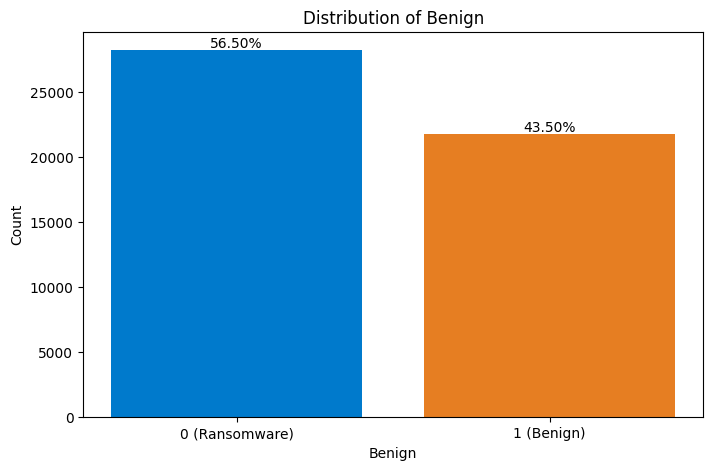

In [12]:
# Menghitung jumlah untuk kolom 'Benign'
benign_counts = train['Benign'].value_counts()

# Menghitung persentase
benign_percentages = benign_counts / benign_counts.sum() * 100

# Membuat grafik batang
plt.figure(figsize=(8, 5))
bars = plt.bar(benign_counts.index, benign_counts.values, color=['#007ACC', '#E67E22'])

# Menambahkan label dan judul
plt.ylabel('Count')
plt.xlabel('Benign')
plt.title('Distribution of Benign')

# Menambahkan persentase pada batang
for bar, percentage in zip(bars, benign_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

# Menampilkan grafik
plt.xticks(ticks=benign_counts.index, labels=['0 (Ransomware)', '1 (Benign)'])
plt.show()

EDA

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

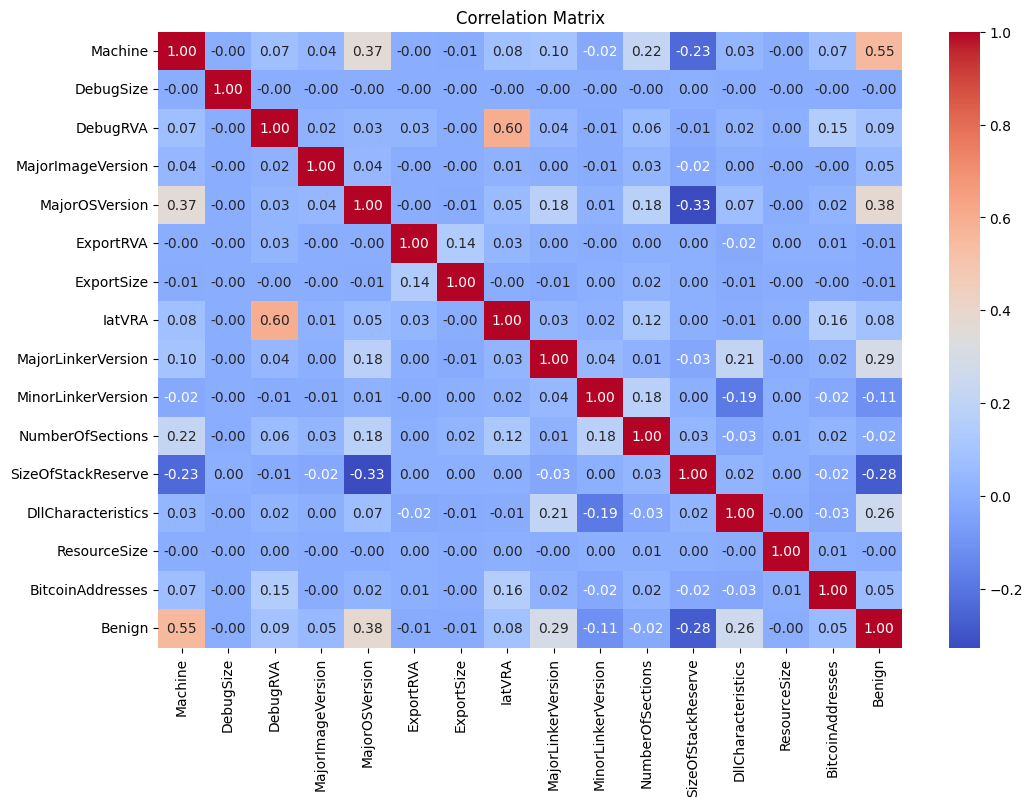

In [14]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Berdasarkan visualisasi di atas, tidak ditemukan adanya multikolinearitas

Berdasarkan output di atas, tidak perlu balancing data karena rentang perbedaan tidak terlalu tinggi

Algoritma Catboost secara internal sudah didesign untuk menangani imbalance dengan class_weight

Tidak ditemukan adanya multikolinearitas pada data numerik

Model

In [15]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split


# Membuat model CatBoost dengan parameter untuk menghindari overfitting
model = CatBoostClassifier(
    iterations=500,               # Jumlah iterasi pohon
    learning_rate=0.01,           # Tingkat pembelajaran yang rendah untuk stabilitas
    depth=4,                      # Kedalaman pohon yang lebih rendah
    l2_leaf_reg=3,                # Penambahan regularisasi L2 untuk menghindari overfitting
    class_weights=[0.88, 1.15],   # Bobot kelas (misalnya, jika data tidak seimbang)
    early_stopping_rounds=50,     # Berhenti lebih awal jika tidak ada peningkatan pada 50 iterasi berturut-turut
    eval_metric='Logloss',        # Metrik evaluasi
    random_seed=42,               # Menetapkan seed acak untuk hasil yang dapat direproduksi
    cat_features=[]               # Daftar fitur kategorikal jika ada (kosongkan jika tidak ada fitur kategorikal)
)

# Melatih model dengan data pelatihan dan validasi
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=1)

# Menampilkan hasil prediksi pada data validasi
predictions = model.predict(X_valid)

0:	learn: 0.6709979	test: 0.6709365	best: 0.6709365 (0)	total: 166ms	remaining: 1m 22s
1:	learn: 0.6497397	test: 0.6496267	best: 0.6496267 (1)	total: 180ms	remaining: 44.8s
2:	learn: 0.6293510	test: 0.6291955	best: 0.6291955 (2)	total: 201ms	remaining: 33.3s
3:	learn: 0.6111084	test: 0.6110032	best: 0.6110032 (3)	total: 236ms	remaining: 29.3s
4:	learn: 0.5924802	test: 0.5924277	best: 0.5924277 (4)	total: 284ms	remaining: 28.2s
5:	learn: 0.5744891	test: 0.5743543	best: 0.5743543 (5)	total: 322ms	remaining: 26.5s
6:	learn: 0.5573512	test: 0.5572434	best: 0.5572434 (6)	total: 374ms	remaining: 26.4s
7:	learn: 0.5407481	test: 0.5405932	best: 0.5405932 (7)	total: 425ms	remaining: 26.1s
8:	learn: 0.5246794	test: 0.5244591	best: 0.5244591 (8)	total: 453ms	remaining: 24.7s
9:	learn: 0.5104008	test: 0.5101616	best: 0.5101616 (9)	total: 485ms	remaining: 23.8s
10:	learn: 0.4956290	test: 0.4953321	best: 0.4953321 (10)	total: 518ms	remaining: 23s
11:	learn: 0.4820808	test: 0.4818095	best: 0.4818095 

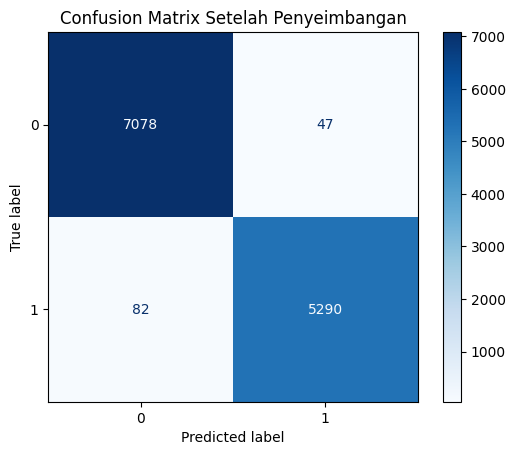

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix Setelah Penyeimbangan")
plt.show()

In [17]:
# Definisi parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 500, 600]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',  # Metrik evaluasi
    cv=3,               # Cross-validation
    verbose=100
)

# Latih model dengan GridSearch
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3; 1/27] START depth=4, iterations=300, learning_rate=0.01................
0:	learn: 0.6711700	total: 13.5ms	remaining: 4.02s
1:	learn: 0.6502887	total: 34.4ms	remaining: 5.13s
2:	learn: 0.6316167	total: 49.9ms	remaining: 4.94s
3:	learn: 0.6129702	total: 61.8ms	remaining: 4.57s
4:	learn: 0.5982031	total: 73ms	remaining: 4.31s
5:	learn: 0.5797082	total: 82.8ms	remaining: 4.05s
6:	learn: 0.5635232	total: 92.9ms	remaining: 3.89s
7:	learn: 0.5473827	total: 106ms	remaining: 3.86s
8:	learn: 0.5316078	total: 116ms	remaining: 3.74s
9:	learn: 0.5174739	total: 125ms	remaining: 3.64s
10:	learn: 0.5054605	total: 137ms	remaining: 3.61s
11:	learn: 0.4906832	total: 159ms	remaining: 3.8s
12:	learn: 0.4765334	total: 176ms	remaining: 3.88s
13:	learn: 0.4631518	total: 185ms	remaining: 3.77s
14:	learn: 0.4497929	total: 193ms	remaining: 3.66s
15:	learn: 0.4370258	total: 205ms	remaining: 3.64s
16:	learn: 0.4250713	total: 214ms	remaining: 3.5

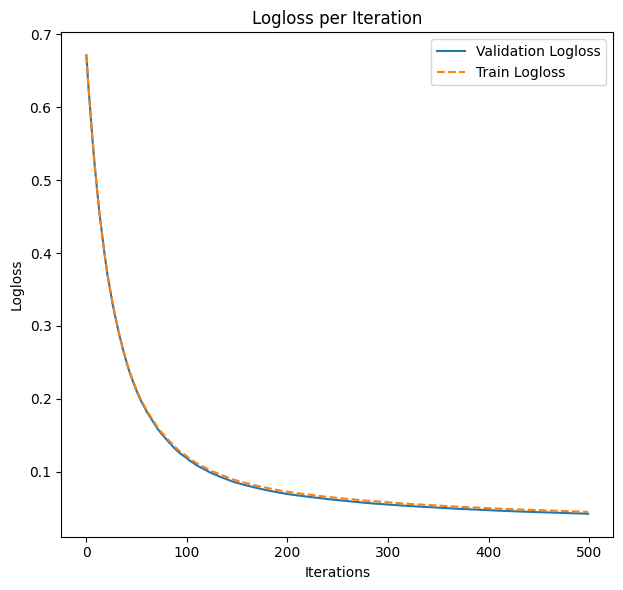

In [18]:
# Mengambil hasil evaluasi selama pelatihan
evals_result = model.get_evals_result()

# Menampilkan grafik loss dan akurasi
plt.figure(figsize=(12, 6))

# Plot Logloss (Loss)
plt.subplot(1, 2, 1)
plt.plot(evals_result['validation']['Logloss'], label='Validation Logloss')
plt.plot(evals_result['learn']['Logloss'], label='Train Logloss', linestyle='--')
plt.title('Logloss per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.legend()

plt.tight_layout()
plt.show()


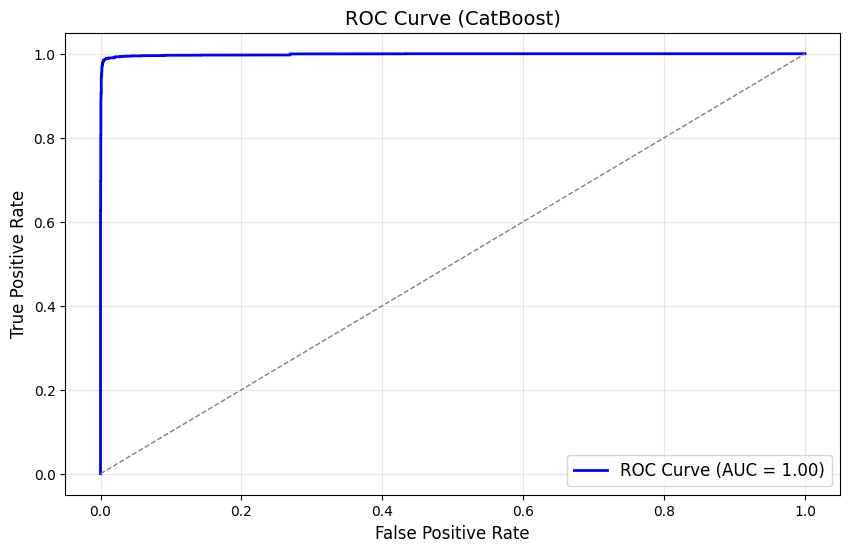

In [19]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Prediksi probabilitas untuk ROC
y_proba = model.predict_proba(X_valid)[:, 1]

# Menghitung ROC dan AUC
fpr, tpr, thresholds = roc_curve(y_valid, y_proba)
roc_auc = auc(fpr, tpr)

# Menampilkan ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve (CatBoost)', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [20]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas prediksi kelas positif

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9896775226054253
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7125
           1       0.99      0.98      0.99      5372

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



In [21]:
import pickle

In [22]:
pickle.dump(model, open('model.pkl', 'wb'))

In [35]:
# Contoh data baru yang tidak memiliki label (data baru untuk prediksi)
new_data = pd.DataFrame({
    'Machine': [332, 332, 34404, 332],
    'DebugSize': [552, 69, 37, 0],
    'DebugRVA': [90732, 425756, 4625900, 0],
    'MajorImageVersion': [0, 0, 0, 6],
    'MajorOSVersion': [5, 6, 6, 5],
    'ExportRVA': [0, 0, 0, 0],
    'ExportSize': [0, 0, 0, 0],
    'IatVRA': [92248, 429296, 5213632, 102640],
    'MajorLinkerVersion': [14, 14, 14, 2],
    'MinorLinkerVersion': [0, 16, 42, 25],
    'NumberOfSections': [6, 6, 5, 8],
    'SizeOfStackReserve': [1048576, 1048576, 1048576, 1048576],
    'DllCharacteristics': [33088, 33088, 33120, 33088],
    'ResourceSize': [0, 0, 0, 0],
    'BitcoinAddresses': [0, 1, 1, 0]
})

In [36]:
model = pickle.load(open('model.pkl', 'rb'))

In [37]:
test = model.predict(new_data)
new_data['Benign'] = test

In [38]:
new_data.head(20)

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,552,90732,0,5,0,0,92248,14,0,6,1048576,33088,0,0,0
1,332,69,425756,0,6,0,0,429296,14,16,6,1048576,33088,0,1,1
2,34404,37,4625900,0,6,0,0,5213632,14,42,5,1048576,33120,0,1,1
3,332,0,0,6,5,0,0,102640,2,25,8,1048576,33088,0,0,0
